In [ ]:
import pandas as pd
import time


In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df=df[['Age','EstimatedSalary','Purchased']]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape

(320, 2)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [ ]:
model=Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
####-----------Batch Gradient Descent-------------###
# model.compile(loss='binary_crossentropy',metrics=['accuracy'])
# start=time.time()
# history=model.fit(x_train,y_train,epochs=10,batch_size=320)
# print(time.time()-start)

In [ ]:
####-----------Stochastic Gradient Descent-------------###

model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
history=model.fit(x_train,y_train,epochs=10,batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 2729.6521 - accuracy: 0.4875
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 79.3781 - accuracy: 0.5375
Epoch 3/10
320/320 [==============================] - 1s 2ms/step - loss: 75.9726 - accuracy: 0.5188
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 77.4155 - accuracy: 0.4906
Epoch 5/10
320/320 [==============================] - 1s 4ms/step - loss: 78.3598 - accuracy: 0.5281
Epoch 6/10
320/320 [==============================] - 1s 2ms/step - loss: 72.7254 - accuracy: 0.5344
Epoch 7/10
320/320 [==============================] - 0s 2ms/step - loss: 70.9555 - accuracy: 0.5406
Epoch 8/10
320/320 [==============================] - 1s 2ms/step - loss: 68.1561 - accuracy: 0.5594
Epoch 9/10
320/320 [==============================] - 0s 2ms/step - loss: 69.8242 - accuracy: 0.5094
Epoch 10/10
320/320 [==============================] - 1s 2ms/step - loss: 68.5209 - accu

In [ ]:
x_scaled.shape

(400, 2)

In [ ]:
###--------------Accuracy in Batch GD----------##
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_scaled,y,epochs=10,batch_size=400,validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 780ms/step - loss: 0.6058 - accuracy: 0.7125 - val_loss: 0.8729 - val_accuracy: 0.3625
Epoch 2/10
1/1 [==============================] - 0s 37ms/step - loss: 0.6009 - accuracy: 0.7125 - val_loss: 0.8707 - val_accuracy: 0.3625
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5974 - accuracy: 0.7125 - val_loss: 0.8689 - val_accuracy: 0.3625
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: 0.5943 - accuracy: 0.7125 - val_loss: 0.8672 - val_accuracy: 0.3625
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.5916 - accuracy: 0.7125 - val_loss: 0.8656 - val_accuracy: 0.3625
Epoch 6/10
1/1 [==============================] - 0s 62ms/step - loss: 0.5890 - accuracy: 0.7125 - val_loss: 0.8640 - val_accuracy: 0.3625
Epoch 7/10
1/1 [==============================] - 0s 39ms/step - loss: 0.5866 - accuracy: 0.7125 - val_loss: 0.8625 - val_accuracy: 0.3625
Epoch 8/10
1/1 [==========

In [ ]:
###--------------Accuracy in Stochastic GD----------##
## not even require more epochs
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_scaled,y,epochs=5,batch_size=1,validation_split=0.2)

Epoch 1/5
320/320 [==============================] - 3s 3ms/step - loss: 0.2756 - accuracy: 0.8750 - val_loss: 0.2276 - val_accuracy: 0.9625
Epoch 2/5
320/320 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.8750 - val_loss: 0.2165 - val_accuracy: 0.9500
Epoch 3/5
320/320 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.8750 - val_loss: 0.2099 - val_accuracy: 0.9625
Epoch 4/5
320/320 [==============================] - 1s 2ms/step - loss: 0.2729 - accuracy: 0.8781 - val_loss: 0.2111 - val_accuracy: 0.9625
Epoch 5/5
320/320 [==============================] - 1s 2ms/step - loss: 0.2748 - accuracy: 0.8781 - val_loss: 0.2044 - val_accuracy: 0.9625


In [ ]:
##--------------loss curve in Stochastic GD------------##
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_scaled,y,epochs=500,batch_size=1,validation_split=0.2,verbose=0)

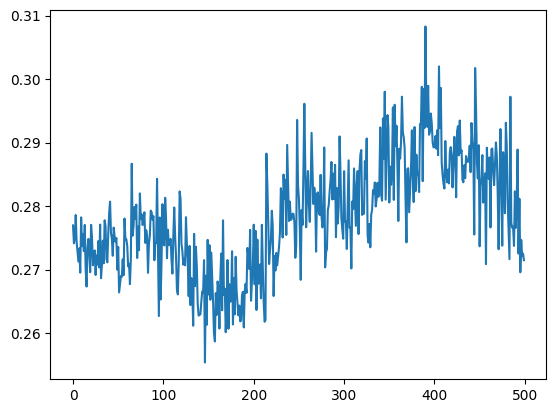

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
##--------------loss curve in Batch GD------------##
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_scaled,y,epochs=500,batch_size=400,validation_split=0.2,verbose=0)

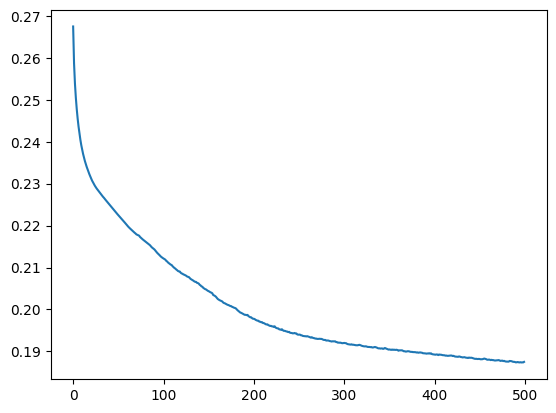

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
##--------------Mini Batch GD------------##
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_scaled,y,epochs=10,batch_size=150,validation_split=0.2,verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 109ms/step - loss: 0.1905 - accuracy: 0.9219 - val_loss: 0.2522 - val_accuracy: 0.9125
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 0.1888 - accuracy: 0.9219 - val_loss: 0.2576 - val_accuracy: 0.9125
Epoch 3/10
3/3 [==============================] - 0s 34ms/step - loss: 0.1887 - accuracy: 0.9219 - val_loss: 0.2620 - val_accuracy: 0.9125
Epoch 4/10
3/3 [==============================] - 0s 53ms/step - loss: 0.1882 - accuracy: 0.9187 - val_loss: 0.2550 - val_accuracy: 0.9125
Epoch 5/10
3/3 [==============================] - 0s 27ms/step - loss: 0.1886 - accuracy: 0.9187 - val_loss: 0.2642 - val_accuracy: 0.9125
Epoch 6/10
3/3 [==============================] - 0s 33ms/step - loss: 0.1887 - accuracy: 0.9219 - val_loss: 0.2592 - val_accuracy: 0.9125
Epoch 7/10
3/3 [==============================] - 0s 33ms/step - loss: 0.1887 - accuracy: 0.9219 - val_loss: 0.2789 - val_accuracy: 0.9000
Epoch 8/10
3/3 [==========